## Multiclass Training meta-estimators
In this example, we discuss the problem of classification when the target variable is composed of more than two classes. This is called multiclass classification.

In scikit-learn, all estimators support multiclass classification out of the box: the most sensible strategy was implemented for the end-user. `sklearn.multiclass` includes one-vs-one and one-vs-rest strategies used to train a multiclass classifier by fitting a set of binary classifiers (the `OneVsOneClassifier` and `OneVsRestClassifier` meta-estimators).

1. Load the dataset

In this example, we use a UCI dataset, generally referred as the Yeast dataset.

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_openml

# Load the dataset
X, y = fetch_openml(
    data_id=181, as_frame=True, return_X_y=True
)
y.value_counts().sort_index()

class_protein_localization
CYT    463
ERL      5
EXC     35
ME1     44
ME2     51
ME3    163
MIT    244
NUC    429
POX     20
VAC     30
Name: count, dtype: int64

2. Strategies Comparison

We compare the following strategies:
- `DecisionTreeClassifier` can handle multiclass classification without needing any special adjustments. It works by breaking down the training data into smaller subsets and focusing on the most common class in each subset.
- `OneVsOneClassifier` trains a set of binary classifiers where each classifier is trained to distinguish between two classes.
- `OneVsRestClassifier` trains a set of binary classifiers where each classifier is trained to distinguish between one class and the rest of the classes.
- `OutputCodeClassifier` trains a set of binary classifiers where each classifier is trained to distinguish between a set of classes from the rest of the classes. The set of classes is defined by a codebook, which is randomly generated in scikit-learn.

Text(0.5, 1.0, 'Density of accuracy scores for diff multiclass strategies')

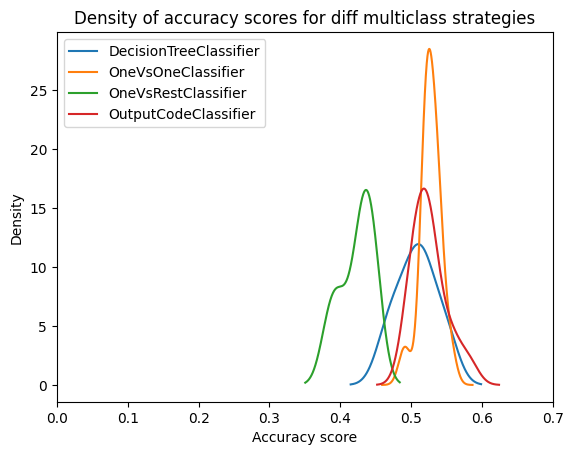

In [3]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

# Train the classifiers
tree = DecisionTreeClassifier(random_state=0)
ovo_tree = OneVsOneClassifier(tree)
ovr_tree = OneVsRestClassifier(tree)
ecoc = OutputCodeClassifier(tree, code_size=2)

# Calculate the cross-validation scores
cv_rlts_tree = cross_validate(tree, X, y, cv=cv, n_jobs=2)
cv_rlts_ovo = cross_validate(ovo_tree, X, y, cv=cv, n_jobs=2)
cv_rlts_ovr = cross_validate(ovr_tree, X, y, cv=cv, n_jobs=2)
cv_rlts_ecoc = cross_validate(ecoc, X, y, cv=cv, n_jobs=2)

# Plot the statistical performance of different strategies
scores = pd.DataFrame(
    {
        "DecisionTreeClassifier": cv_rlts_tree["test_score"],
        "OneVsOneClassifier": cv_rlts_ovo["test_score"],
        "OneVsRestClassifier": cv_rlts_ovr["test_score"],
        "OutputCodeClassifier": cv_rlts_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0, 0.7])
ax.set_title("Density of accuracy scores for diff multiclass strategies")

3. Importance of Hyperparameters search

It was later shown in research that the multiclass strategies would show similar scores if the hyperparameters of the base classifiers are first optimized.

We try to reproduce such result by at least optimizing the depth of the base decision tree.

Text(0.5, 1.0, 'Density of accuracy scores for diff multiclass strategies')

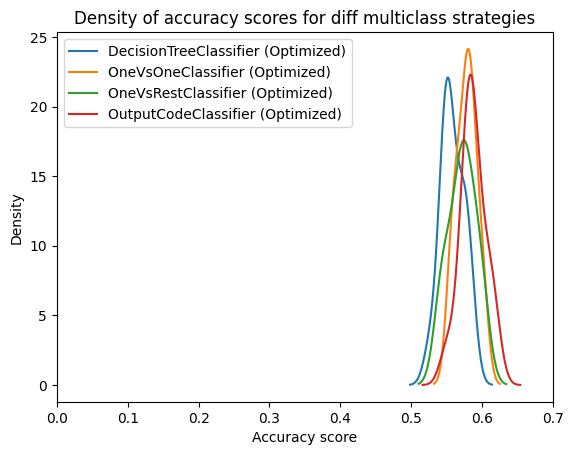

In [4]:
# Import library
from sklearn.model_selection import GridSearchCV

# Re-train the classifier with optimized base decision tree
tree_opt = GridSearchCV(tree, param_grid={"max_depth": [3, 5, 8]}, cv=3)
ovo_tree = OneVsOneClassifier(tree_opt)
ovr_tree = OneVsRestClassifier(tree_opt)
ecoc = OutputCodeClassifier(tree_opt, code_size=2)

# Calculate the cross-validation scores
cv_rlts_tree = cross_validate(tree_opt, X, y, cv=cv, n_jobs=2)
cv_rlts_ovo = cross_validate(ovo_tree, X, y, cv=cv, n_jobs=2)
cv_rlts_ovr = cross_validate(ovr_tree, X, y, cv=cv, n_jobs=2)
cv_rlts_ecoc = cross_validate(ecoc, X, y, cv=cv, n_jobs=2)

# Plot the statistical performance of different strategies
scores = pd.DataFrame(
    {
        "DecisionTreeClassifier (Optimized)": cv_rlts_tree["test_score"],
        "OneVsOneClassifier (Optimized)": cv_rlts_ovo["test_score"],
        "OneVsRestClassifier (Optimized)": cv_rlts_ovr["test_score"],
        "OutputCodeClassifier (Optimized)": cv_rlts_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0, 0.7])
ax.set_title("Density of accuracy scores for diff multiclass strategies")